In [1]:
pip install selenium webdriver-manager

Note: you may need to restart the kernel to use updated packages.


In [2]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager

# Setup WebDriver
options = webdriver.ChromeOptions()
options.add_argument("--headless")  # Run in headless mode (optional)
options.add_argument("--no-sandbox")
options.add_argument("--disable-dev-shm-usage")

# Start Chrome Driver
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=options)

# Test Selenium
driver.get("https://www.google.com")
print("✅ Selenium is working!")
driver.quit()

✅ Selenium is working!


In [5]:
import requests
from bs4 import BeautifulSoup

def bing_search_scraper(query, num_results=5):
    search_url = f"https://www.bing.com/search?q={query.replace(' ', '+')}&count={num_results}"
    headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64)"}

    response = requests.get(search_url, headers=headers)
    if response.status_code != 200:
        print("Failed to fetch search results")
        return []

    soup = BeautifulSoup(response.text, "html.parser")
    search_results = soup.find_all("li", {"class": "b_algo"})  # Extracting search result blocks

    links = [result.find("a")["href"] for result in search_results if result.find("a")]
    return links

# Example usage
query = "Top AI companies"
extracted_links = bing_search_scraper(query, num_results=5)
print("Extracted links:", extracted_links)

Extracted links: ['https://www.forbes.com/lists/ai50/', 'https://www.geeksforgeeks.org/ai-companies-in-india/', 'https://aimagazine.com/top10/top-10-ai-companies-to-watch', 'https://technologymagazine.com/top10/top-10-ai-companies', 'https://www.geeksforgeeks.org/top-ai-companies/', 'https://www.forbesindia.com/article/explainers/top-ai-companies-india/95344/1', 'https://finbold.com/guide/10-biggest-ai-companies-in-the-world/', 'https://www.datamation.com/featured/ai-companies/', 'https://aimagazine.com/top10/top-10-ai-brands', 'https://www.cbinsights.com/learn/ai-100-2024']


In [6]:
import requests
from bs4 import BeautifulSoup

def extract_ai_companies(url):
    headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64)"}
    response = requests.get(url, headers=headers)
    
    if response.status_code != 200:
        print(f"Failed to fetch {url}")
        return []

    soup = BeautifulSoup(response.text, "html.parser")
    company_names = []

    # Try different HTML tag patterns
    for tag in ["h1", "h2", "h3", "strong", "b"]:
        companies = soup.find_all(tag)
        for company in companies:
            text = company.get_text(strip=True)
            if "AI" in text or len(text.split()) < 5:  # Filter relevant names
                company_names.append(text)

    return list(set(company_names))  # Remove duplicates

# Example usage
ai_company_data = {}

for link in extracted_links:
    ai_company_data[link] = extract_ai_companies(link)

# Print results
for site, companies in ai_company_data.items():
    print(f"\nAI Companies from {site}:")
    print(companies)

Failed to fetch https://aimagazine.com/top10/top-10-ai-companies-to-watch
Failed to fetch https://technologymagazine.com/top10/top-10-ai-companies
Failed to fetch https://aimagazine.com/top10/top-10-ai-brands

AI Companies from https://www.forbes.com/lists/ai50/:
['The AI 50 2024']

AI Companies from https://www.geeksforgeeks.org/ai-companies-in-india/:
['SAP', '2. Zensar Technologies', '10. Arya.ai', 'What is Artificial Intelligence?', '6. Fractal Analytics', 'natural language processing', 'Conclusion', 'Data Science Training Program', 'Artificial Intelligence', 'LLM Spark', 'Similar Reads', 'What is the use of AI companies?', '7. Cyient Ltd', 'Features:', 'IoT solutions', 'What is AI?', 'top AI companies', 'Oracle', '4. Kellton', 'Thank You!', 'Top 10 AI Companies in India in 2024', 'Salesforce', 'Name some of the top AI companies.', 'Get IBM Certification', '3. Saksoft', '5. Delta4 Infotech', '9. Haptik', 'FAQs', '1. Persistent System', 'Top 10 AI Companies in India', '8. Infosys', 

In [9]:
import re

# Raw extracted data from various sources
extracted_data = [
    'Infosys', 'SAP', 'natural language processing', 'Haptik', 'Data Science Training Program',
    'LLM Spark', 'Artificial Intelligence', 'Arya.ai', 'Persistent System', 'IoT solutions',
    'top AI companies', 'Oracle', 'Top 10 AI Companies in India in 2024', 'Fractal Analytics',
    'Salesforce', 'Name some of the top AI companies.', 'Saksoft', 'Zensar Technologies',
    'Get IBM Certification', 'Cyient Ltd', 'Delta4 Infotech', 'Top 10 AI Companies in India',
    'top 10 AI companies', '90% fee refund', 'Kellton'
]

# Function to clean and extract company names
def clean_company_names(data):
    clean_list = []
    for item in data:
        item = re.sub(r'^\d+\.\s+', '', item).strip()  # Remove numbering

        # Define unwanted keywords
        unwanted_keywords = [
            'what is', 'faq', 'conclusion', 'thank you', 'projects', 'features',
            'similar reads', 'training', 'program', 'certification', 'refund',
            'solutions', 'top ai companies', 'top 10 ai companies', 'name some',
            'artificial intelligence', 'llm', 'natural language processing'
        ]

        # Skip if the item contains unwanted keywords
        if any(kw in item.lower() for kw in unwanted_keywords):
            continue

        clean_list.append(item)

    return sorted(set(clean_list))  # Remove duplicates and sort

# Clean the data
cleaned_companies = clean_company_names(extracted_data)

# Display the cleaned company names
print(cleaned_companies)

['Arya.ai', 'Cyient Ltd', 'Delta4 Infotech', 'Fractal Analytics', 'Haptik', 'Infosys', 'Kellton', 'Oracle', 'Persistent System', 'SAP', 'Saksoft', 'Salesforce', 'Zensar Technologies']


In [4]:
pip install requests beautifulsoup4 pandas

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install google-search-results

  Preparing metadata (setup.py) ... done
  Created wheel for google-search-results: filename=google_search_results-2.4.2-py3-none-any.whl size=32009 sha256=60ca391d24ce4e381c2ea9f0af27b6b3db96ed378c74b3246d0e2ae73306bedb
  Stored in directory: /Users/qaleelshabacker/Library/Caches/pip/wheels/0c/47/f5/89b7e770ab2996baf8c910e7353d6391e373075a0ac213519e
Successfully built google-search-results
Note: you may need to restart the kernel to use updated packages.


In [6]:
from serpapi import GoogleSearch
import time
import pandas as pd

SERPAPI_KEY = "d69c64c454d6b06215cd06ee7885105f98648d7e0494ac66b3a3275b8f6e2054"

companies = ['Arya.ai', 'Cyient Ltd', 'Delta4 Infotech', 'Fractal Analytics', 
             'Haptik', 'Infosys', 'Kellton', 'Oracle', 'Persistent System', 
             'SAP', 'Saksoft', 'Salesforce', 'Zensar Technologies']

company_websites = {}

for company in companies:
    params = {
        "q": f"{company} official website",
        "api_key": SERPAPI_KEY
    }
    
    try:
        search = GoogleSearch(params)
        results = search.get_dict()
        organic_results = results.get("organic_results", [])
        
        if organic_results:
            company_websites[company] = organic_results[0]['link']
        else:
            company_websites[company] = "Not Found"
        
        time.sleep(2)  # Avoid hitting request limits
        
    except Exception as e:
        print(f"Error fetching {company}: {e}")

# Convert to DataFrame
df_websites = pd.DataFrame(list(company_websites.items()), columns=["Company", "Website"])
print(df_websites)

                Company                         Website
0               Arya.ai                https://arya.ai/
1            Cyient Ltd         https://www.cyient.com/
2       Delta4 Infotech     https://delta4infotech.com/
3     Fractal Analytics             https://fractal.ai/
4                Haptik          https://www.haptik.ai/
5               Infosys        https://www.infosys.com/
6               Kellton        https://www.kellton.com/
7                Oracle         https://www.oracle.com/
8     Persistent System     https://www.persistent.com/
9                   SAP  https://www.sap.com/index.html
10              Saksoft        https://www.saksoft.com/
11           Salesforce     https://www.salesforce.com/
12  Zensar Technologies         https://www.zensar.com/


In [8]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time
company_urls = {
    "Arya.ai": "https://arya.ai/",
    "Cyient Ltd": "https://www.cyient.com/",
    "Delta4 Infotech": "https://delta4infotech.com/",
    "Fractal Analytics": "https://fractal.ai/",
    "Haptik": "https://www.haptik.ai/",
    "Infosys": "https://www.infosys.com/",
    "Kellton": "https://www.kellton.com/",
    "Oracle": "https://www.oracle.com/",
    "Persistent System": "https://www.persistent.com/",
    "SAP": "https://www.sap.com/index.html",
    "Saksoft": "https://www.saksoft.com/",
    "Salesforce": "https://www.salesforce.com/",
    "Zensar Technologies": "https://www.zensar.com/"
}

company_data = []

for company, url in company_urls.items():
    try:
        response = requests.get(url, timeout=10)
        response.raise_for_status()  # Raise an error if request fails
        
        soup = BeautifulSoup(response.text, "html.parser")
        
        # Extract page title
        title = soup.title.string if soup.title else "No Title"

        # Extract meta description (usually contains company overview)
        description_tag = soup.find("meta", attrs={"name": "description"})
        description = description_tag["content"] if description_tag else "No Description Found"

        company_data.append([company, url, title, description])
        print(f"✅ Scraped: {company}")

        time.sleep(2)  # Avoid too many requests in a short time

    except Exception as e:
        print(f"❌ Failed to scrape {company}: {e}")

# Convert to DataFrame
df_company_info = pd.DataFrame(company_data, columns=["Company", "Website", "Title", "Description"])
df_company_info.to_csv("AI_Companies_Details.csv", index=False)

print("✅ Data saved successfully as AI_Companies_Details.csv")

✅ Scraped: Arya.ai
✅ Scraped: Cyient Ltd
✅ Scraped: Delta4 Infotech
❌ Failed to scrape Fractal Analytics: 403 Client Error: Forbidden for url: https://fractal.ai/
✅ Scraped: Haptik
✅ Scraped: Infosys
✅ Scraped: Kellton
✅ Scraped: Oracle
✅ Scraped: Persistent System
❌ Failed to scrape SAP: 403 Client Error: Forbidden for url: https://www.sap.com/index.html
✅ Scraped: Saksoft
✅ Scraped: Salesforce
✅ Scraped: Zensar Technologies
✅ Data saved successfully as AI_Companies_Details.csv


In [13]:
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/120.0.0.0 Safari/537.36"
}

for company, url in {"Fractal Analytics": "https://fractal.ai/", "SAP": "https://www.sap.com/index.html"}.items():
    try:
        response = requests.get(url, headers=headers, timeout=10)
        response.raise_for_status()

        soup = BeautifulSoup(response.text, "html.parser")
        title = soup.title.string if soup.title else "No Title"
        description_tag = soup.find("meta", attrs={"name": "description"})
        description = description_tag["content"] if description_tag else "No Description Found"

        company_data.append([company, url, title, description])
        print(f"✅ Retried & Scraped: {company}")

    except Exception as e:
        print(f"❌ Still Failed: {company} - {e}")

# Save updated data
df_company_info = pd.DataFrame(company_data, columns=["Company", "Website", "Title", "Description"])
df_company_info.to_csv("AI_Companies_Details.csv", index=False)

✅ Retried & Scraped: Fractal Analytics
❌ Still Failed: SAP - 403 Client Error: Forbidden for url: https://www.sap.com/index.html


In [14]:
import pandas as pd

# Load the scraped data
df = pd.read_csv("AI_Companies_Details.csv")

# Display the first few rows
print(df.head())

           Company                      Website  \
0          Arya.ai             https://arya.ai/   
1       Cyient Ltd      https://www.cyient.com/   
2  Delta4 Infotech  https://delta4infotech.com/   
3           Haptik       https://www.haptik.ai/   
4          Infosys     https://www.infosys.com/   

                                               Title  \
0             Arya.ai: Enterprise-Grade AI Solutions   
1                 Delivering Intelligent Engineering   
2                                    Delta4 Infotech   
3  Drive Business Efficiency at Scale with Genera...   
4  Infosys - Consulting | IT Services | Digital T...   

                                         Description  
0  Accelerate AI adoption with Arya.aiâs produc...  
1  Cyient's engineering services & digital transf...  
2                               No Description Found  
3  Tap into Jio Haptik's Generative AI capabiliti...  
4  Infosys is a global leader in next-generation ...  


In [15]:
df.isnull().sum()

Company        0
Website        0
Title          0
Description    0
dtype: int64

In [16]:
df.duplicated().sum()

1

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Company      13 non-null     object
 1   Website      13 non-null     object
 2   Title        13 non-null     object
 3   Description  13 non-null     object
dtypes: object(4)
memory usage: 548.0+ bytes


In [18]:
# Clean Data
df = df.drop_duplicates()
df["Company"] = df["Company"].str.strip()
df["Website"] = df["Website"].str.strip()
df["Description"] = df["Description"].fillna("Not Available")

# Save cleaned data
df.to_csv("AI_Companies_Cleaned.csv", index=False)

print("✅ Data cleaned and saved as 'AI_Companies_Cleaned.csv'")

✅ Data cleaned and saved as 'AI_Companies_Cleaned.csv'


In [19]:
# Load the cleaned data
df = pd.read_csv("AI_Companies_Cleaned.csv")

# Display basic statistics
print(df.info())   # Check data types & missing values
print(df.describe(include="all"))  # Get summary statistics

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Company      12 non-null     object
 1   Website      12 non-null     object
 2   Title        12 non-null     object
 3   Description  12 non-null     object
dtypes: object(4)
memory usage: 516.0+ bytes
None
        Company           Website                                   Title  \
count        12                12                                      12   
unique       12                12                                      12   
top     Arya.ai  https://arya.ai/  Arya.ai: Enterprise-Grade AI Solutions   
freq          1                 1                                       1   

                 Description  
count                     12  
unique                    11  
top     No Description Found  
freq                       2  


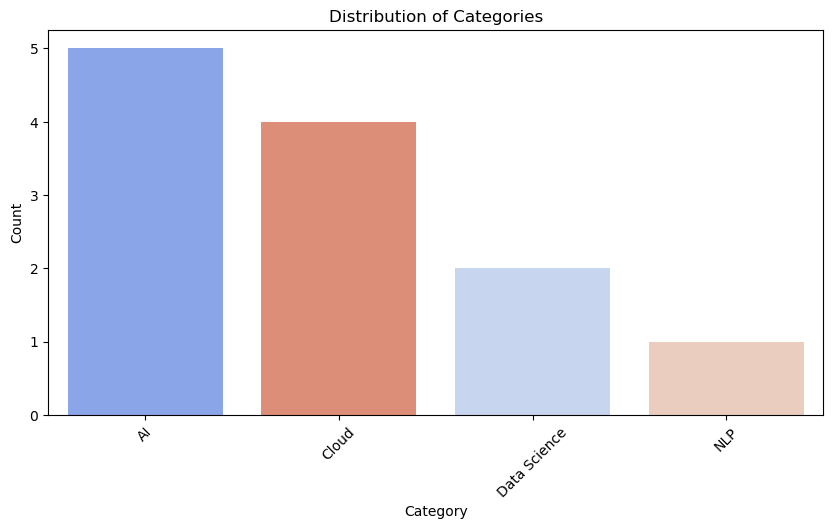

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.countplot(data=df, x="Category", hue="Category", order=df["Category"].value_counts().index, palette="coolwarm", legend=False)
plt.xticks(rotation=45)
plt.xlabel("Category")
plt.ylabel("Count")
plt.title("Distribution of Categories")
plt.show()

In [24]:
!pip install wordcloud

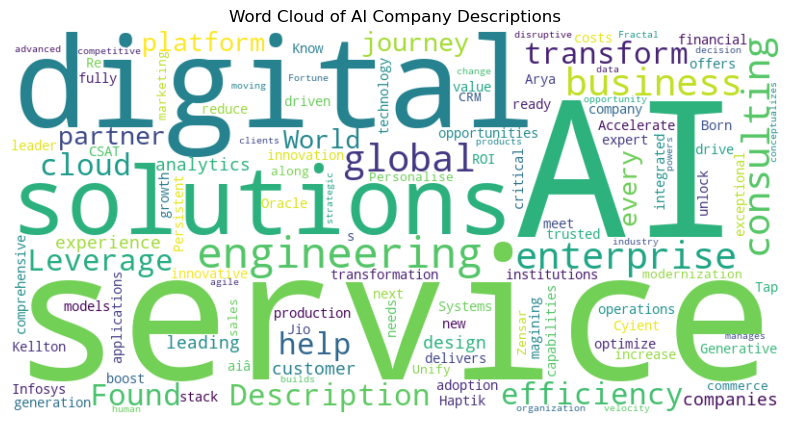

In [25]:
from wordcloud import WordCloud

# Combine all descriptions
text = " ".join(df["Description"])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

# Display word cloud
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of AI Company Descriptions")
plt.show()

In [28]:
pip install textblob

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 624.3/624.3 kB 1.4 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [29]:
from textblob import TextBlob

# Function to calculate sentiment score
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

# Apply sentiment analysis
df["Sentiment Score"] = df["Description"].apply(get_sentiment)

# Classify sentiment
df["Sentiment"] = df["Sentiment Score"].apply(lambda x: "Positive" if x > 0 else "Negative" if x < 0 else "Neutral")

# Display sentiment analysis results
print(df[["Company", "Sentiment Score", "Sentiment"]].head())

           Company  Sentiment Score Sentiment
0          Arya.ai         0.000000   Neutral
1       Cyient Ltd         0.068182  Positive
2  Delta4 Infotech         0.000000   Neutral
3           Haptik         0.000000   Neutral
4          Infosys         0.000000   Neutral


In [30]:
sentiment_counts = df["Sentiment"].value_counts()
print(sentiment_counts)

Sentiment
Neutral     8
Positive    4
Name: count, dtype: int64


In [31]:
sentiment_percentage = df["Sentiment"].value_counts(normalize=True) * 100
print(sentiment_percentage)

Sentiment
Neutral     66.666667
Positive    33.333333
Name: proportion, dtype: float64


In [32]:
sentiment_counts.to_csv("Sentiment_Summary.csv")
print("✅ Sentiment summary saved as 'Sentiment_Summary.csv'")

✅ Sentiment summary saved as 'Sentiment_Summary.csv'


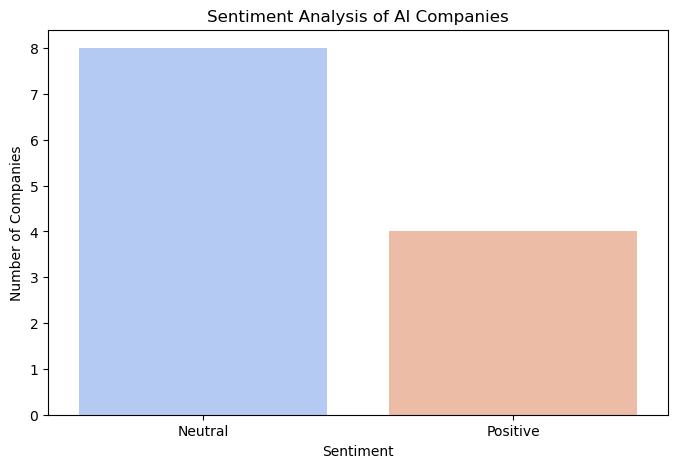

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count sentiment categories
sentiment_counts = df["Sentiment"].value_counts()

# Plot sentiment distribution
plt.figure(figsize=(8, 5))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, hue=sentiment_counts.index, dodge=False, palette="coolwarm")
plt.xlabel("Sentiment")
plt.ylabel("Number of Companies")
plt.title("Sentiment Analysis of AI Companies")
plt.legend([],[], frameon=False)  # Hide legend
plt.show()